In [ ]:
pip install keras

In [ ]:
pip install pandas

In [ ]:
pip install pandas-datareader

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
key="your_own_key"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [118]:
df=pd.read_csv('AAPL.csv')

In [119]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-03 00:00:00+00:00,143.50,145.30,143.1000,144.88,14258300,33.955484,34.381406,33.860834,34.282024,57033200,0.0,1.0
1,AAPL,2017-07-05 00:00:00+00:00,144.09,144.79,142.7237,143.69,20758795,34.095092,34.260728,33.771793,34.000442,83035180,0.0,1.0
2,AAPL,2017-07-06 00:00:00+00:00,142.73,143.50,142.4100,143.02,23374374,33.773284,33.955484,33.697564,33.841905,93497496,0.0,1.0
3,AAPL,2017-07-07 00:00:00+00:00,144.18,144.75,142.9000,142.90,18505351,34.116388,34.251263,33.813510,33.813510,74021404,0.0,1.0
4,AAPL,2017-07-10 00:00:00+00:00,145.06,145.95,143.3700,144.11,21030466,34.324617,34.535212,33.924723,34.099824,84121864,0.0,1.0


In [120]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-06-23 00:00:00+00:00,138.27,138.590,135.630,136.820,72433768,138.27,138.590,135.630,136.820,72433768,0.0,1.0
1253,AAPL,2022-06-24 00:00:00+00:00,141.66,141.910,139.770,139.900,89116837,141.66,141.910,139.770,139.900,89116837,0.0,1.0
1254,AAPL,2022-06-27 00:00:00+00:00,141.66,143.490,140.965,142.695,70207908,141.66,143.490,140.965,142.695,70207908,0.0,1.0
1255,AAPL,2022-06-28 00:00:00+00:00,137.44,143.422,137.325,142.130,67315328,137.44,143.422,137.325,142.130,67315328,0.0,1.0
1256,AAPL,2022-06-29 00:00:00+00:00,139.23,140.670,136.670,137.460,66242411,139.23,140.670,136.670,137.460,66242411,0.0,1.0


In [121]:
df1=df.reset_index()['close']

In [122]:
df1

0       143.50
1       144.09
2       142.73
3       144.18
4       145.06
         ...  
1252    138.27
1253    141.66
1254    141.66
1255    137.44
1256    139.23
Name: close, Length: 1257, dtype: float64

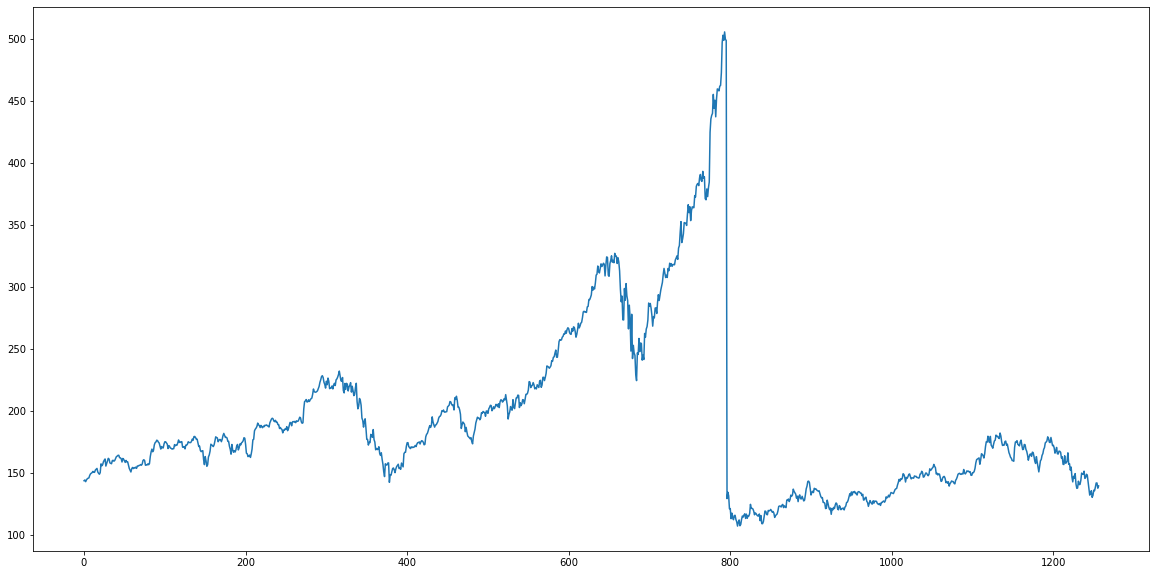

In [123]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [124]:
import numpy as np

In [125]:
df1

0       143.50
1       144.09
2       142.73
3       144.18
4       145.06
         ...  
1252    138.27
1253    141.66
1254    141.66
1255    137.44
1256    139.23
Name: close, Length: 1257, dtype: float64

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [127]:
print(df1)

[[0.09182217]
 [0.09329994]
 [0.08989355]
 ...
 [0.08721353]
 [0.07664371]
 [0.08112711]]


In [128]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [129]:
training_size,test_size

(817, 440)

In [130]:
train_data

array([[9.18221666e-02],
       [9.32999374e-02],
       [8.98935504e-02],
       [9.35253601e-02],
       [9.57294928e-02],
       [9.69067001e-02],
       [9.74326863e-02],
       [1.02517220e-01],
       [1.05698184e-01],
       [1.07000626e-01],
       [1.08303068e-01],
       [1.10657483e-01],
       [1.08954289e-01],
       [1.08778961e-01],
       [1.13337508e-01],
       [1.14965560e-01],
       [1.16768942e-01],
       [1.09505322e-01],
       [1.06850344e-01],
       [1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],


In [131]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [132]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [133]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [134]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [135]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [136]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [137]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [138]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 240ms/step - loss: 0.0474 - val_loss: 0.0053
Epoch 2/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0128 - val_loss: 0.0047
Epoch 3/100
12/12 [==============================] - 2s 154ms/step - loss: 0.0100 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0094 - val_loss: 3.5881e-04
Epoch 5/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0085 - val_loss: 7.0803e-04
Epoch 6/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0079 - val_loss: 2.6872e-04
Epoch 7/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0072 - val_loss: 7.0135e-04
Epoch 8/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0064 - val_loss: 2.6417e-04
Epoch 9/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0077 - val_loss: 2.6438e-04
Epoch 10/100
12/12 [==============================] - 2s 158ms/step

In [140]:
import tensorflow as tf

In [141]:
tf.__version__

'2.8.0'

In [142]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [143]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [144]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

236.35149863860042

In [145]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

150.62006452007648

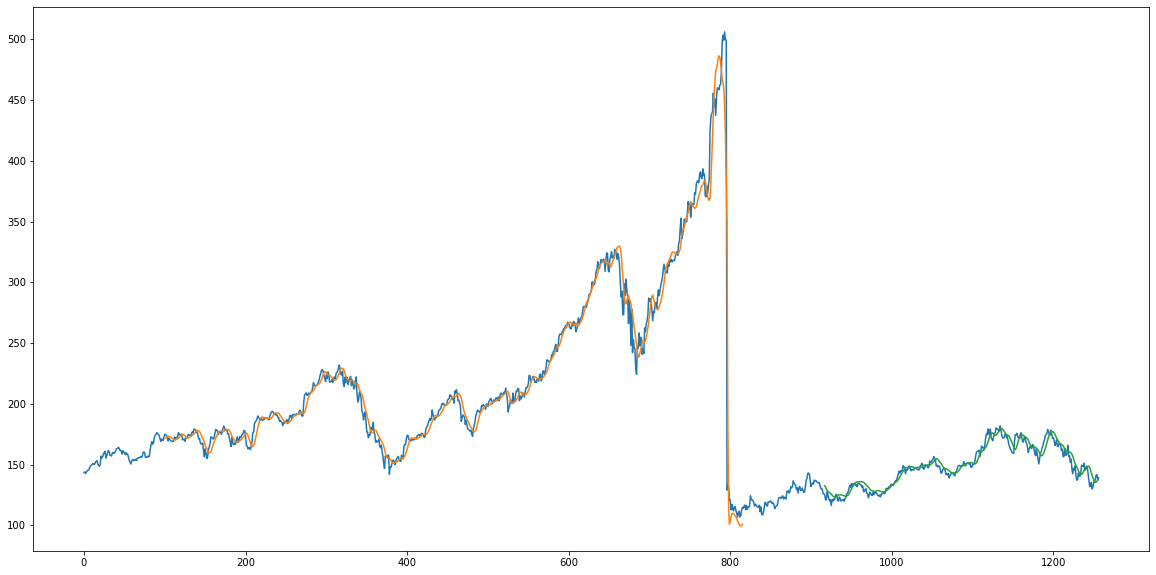

In [146]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [147]:
len(test_data)

440

In [148]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [149]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [150]:
temp_input

[0.16235441452723853,
 0.17029430181590482,
 0.17392611145898557,
 0.16350657482780212,
 0.1547902316844082,
 0.15539135879774574,
 0.16518472135253592,
 0.1645835942391985,
 0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.1

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat)
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [153]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [154]:
import matplotlib.pyplot as plt

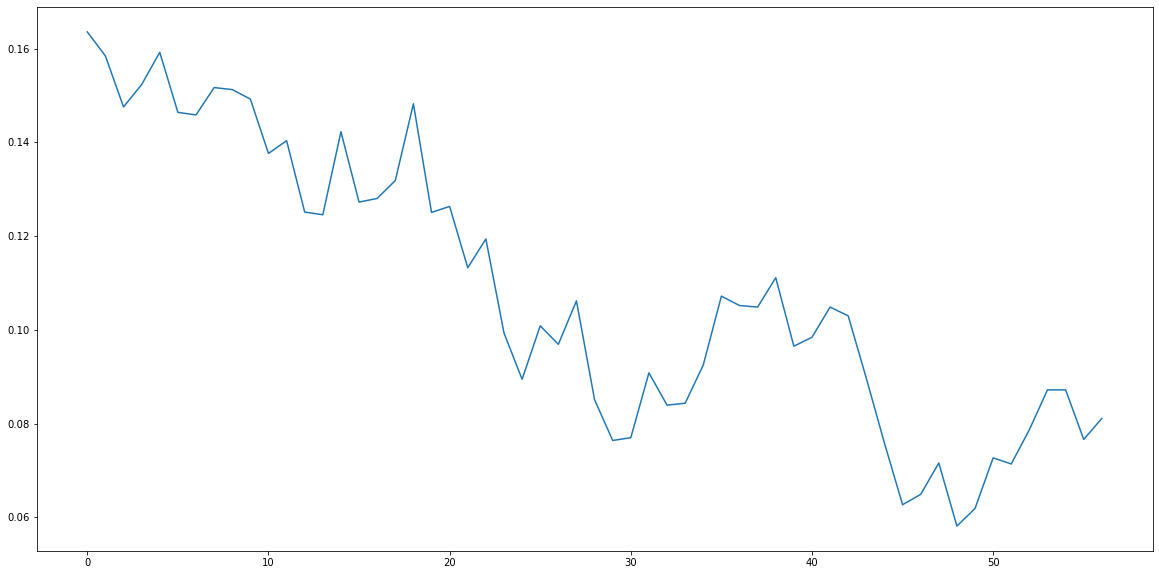

In [156]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
#df3=scaler.inverse_transform(df3).tolist()

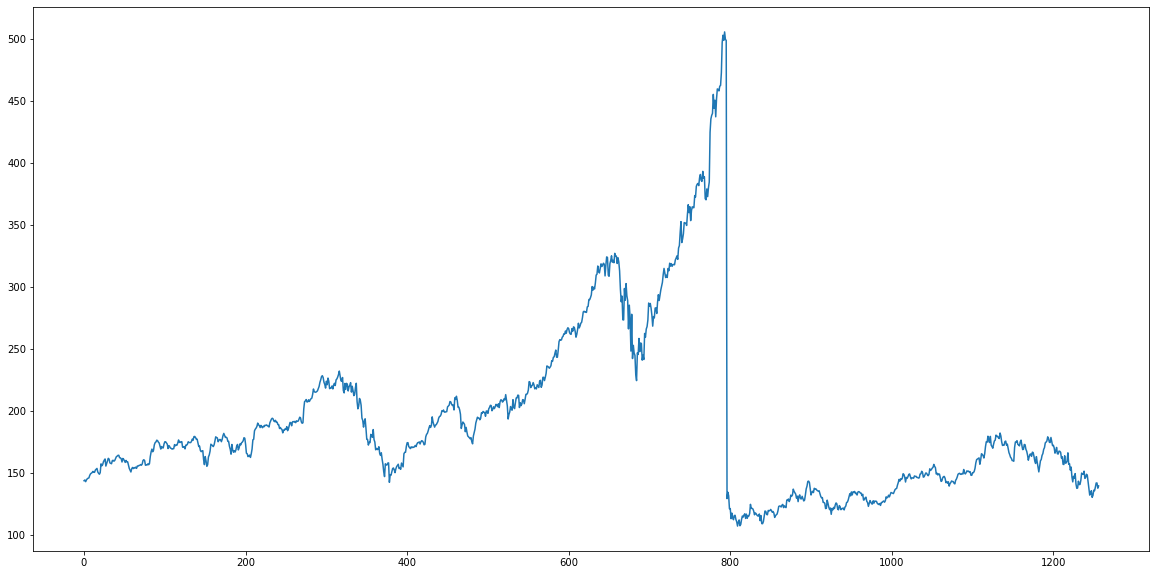

In [152]:
plt.plot(df3)